
# Projcet2 - Predicting Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We'll select "Medical Appointment No Shows" from Kaggle to analyze. This dataset contains approximately 110,000 medical appointments and 14 related variables. From this data set, we want to understand the characteristics of people who cancel medical appointments. Here's what each variable means, as explained by Kaggle

- PatientId : Identification of a patient
- AppointmentID : Identification of each appointment
- Gender : Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
- DataMarcacaoConsulta : The day of the actuall appointment, when they have to visit the doctor.
- DataAgendamento : The day someone called or registered the appointment, this is before appointment of course.
- Age : How old is the patient.
- Neighbourhood : Where the appointment takes place.
- Scholarship : True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
- Hipertension : True or False
- Diabetes : True or False
- Alcoholism : True or False
- Handcap : True or False
- SMS_received : 1 or more messages sent to the patient.
- No-show : True or False.

From the above list,
1. gender
2. the time period between the date of the appointment and the date of the appointment
3. age
4. scholarship
5. whether you have certain medical conditions (high blood pressure, diabetes, alcoholism)
6. Handicap
7. receipt of SMS

as independent variables in our analysis, we want to understand the characteristics of people who cancel their medical appointments, which is our dependent variable, and identify important factors.

First, load the library and import the data.

### Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling

### Check data
Procedurally review the dataset, identifying and resolving issues with the dataset at each step of the way.

In [2]:
df.shape

(110527, 14)

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are a few things we can see and fix right away.
1. there are no NaN values, so no missing value handling is needed.
2. Fix a typo in the column name.
3. Convert the date data to datetime format.
4. The AppointmentDay column only has a time of 00:00:00, so remove it. Remove the time in the ScheduledDay column as well.
5. Add a column for calculating the date difference.
6. Convert the True, False values in the No-show column to 1, 0.
7. Check for outliers and remove them.

### Modify column names and convert data types

In [5]:
# Fix column name typos 
df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace=True)

# Unify hyphens in column names
df.rename(columns=lambda x: x.strip().replace("-", "_"), inplace=True)

# Convert columns ScheduledDay, AppointmentDay to datetime type and remove time
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

# Add a date difference column and convert to integer
df['WaitingDays'] = df['AppointmentDay'] - df['ScheduledDay']
df['WaitingDays'] = df['WaitingDays'].dt.days.astype('int64')

# Convert No_show column to int type
df['No_show'] = df['No_show'].map({'Yes': 1, 'No': 0}).astype('int64')


In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


### Check and fix invalid values
Next, we'll go through the process of checking for and correcting invalid values.

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,15.254996
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


First, we see that the minimum values in the Age and WaitingDays columns are negative. Since negative numbers can't exist, we determine that this is bad data and remove it.

In [8]:
# Delete rows with negative Age
df.drop(df[df['Age'] < 0].index, inplace=True)
# Delete rows with negative WaitingDays
df.drop(df[df['WaitingDays'] < 0].index, inplace=True)

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474906e+14,5.675304e+06,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,0.201898,10.184345
std,2.560860e+14,7.129691e+04,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,0.401419,15.255153
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173185e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.438963e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


### Remove unnecessary columns
Finally, remove the unnecessary columns. Remove the columns AppointmentID, Neighbourhood, ScheduledDay, and AppointmentDay as they are not needed for analysis.

In [10]:
# Remove unnecessary columns. Remove the AppointmentID, Neighborhood, ScheduledDay, and AppointmentDay columns as they are not needed for analysis.
df.drop(['AppointmentID', 'Neighbourhood', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
df.head()

,PatientId,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays
0,2.987250e+13,F,62,0,1,0,0,0,0,0,0
1,5.589978e+14,M,56,0,0,0,0,0,0,0,0
2,4.262962e+12,F,62,0,0,0,0,0,0,0,0
3,8.679512e+11,F,8,0,0,0,0,0,0,0,0
4,8.841186e+12,F,56,0,1,1,0,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis

Based on the above, we will analyze the variables we initially determined by asking several questions.

### Question 1. Does Gender have an impact on canceling medical appointments?

In [11]:
# Group by Gender to find the percentage of No_shows.
df.groupby('Gender')['No_show'].mean()

Gender
F    0.203115
M    0.199638
Name: No_show, dtype: float64

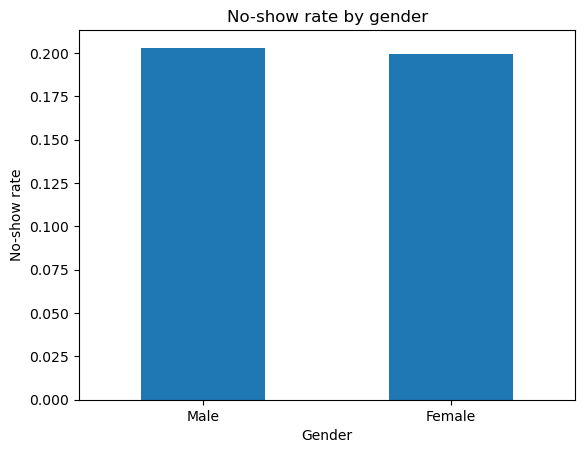

In [12]:
# Plot a histogram by Gender.
ax = df.groupby('Gender')['No_show'].mean().plot(kind='bar')
ax.set_title('No-show rate by gender')
ax.set_ylabel('No-show rate')
ax.set_xticklabels(['Male', 'Female'], rotation=0)
plt.show()

Based on the above, 'Gender' does not appear to have an impact on no-shows.

### Question 2. Does the time period between AppointmentDay and ScheduledDay affect the ability to cancel an appointment?

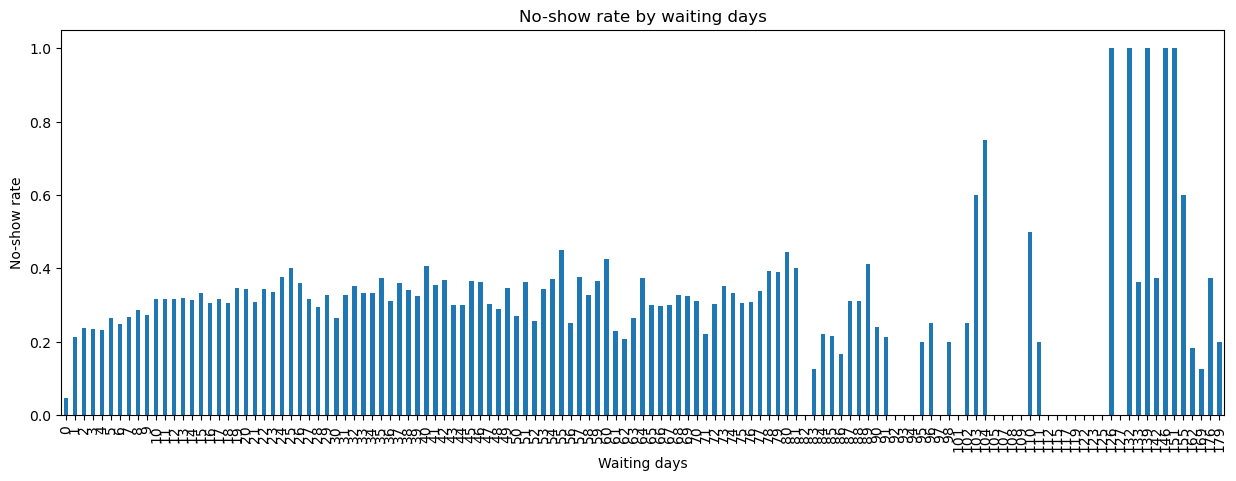

In [13]:
# Plot a histogram with WaitingDays as the x-axis and the percentage of No_shows as the y-axis.
ax = df.groupby('WaitingDays')['No_show'].mean().plot(kind='bar', figsize=(15, 5))
ax.set_title('No-show rate by waiting days')
ax.set_ylabel('No-show rate')
ax.set_xlabel('Waiting days')
plt.show()

Describe, the values with WaitingDays of 0 account for 25%. This is because we're averaging No_show, which doesn't represent the number of people at each x value. To avoid this distortion, we'll visualize WaitingDays in quartiles.

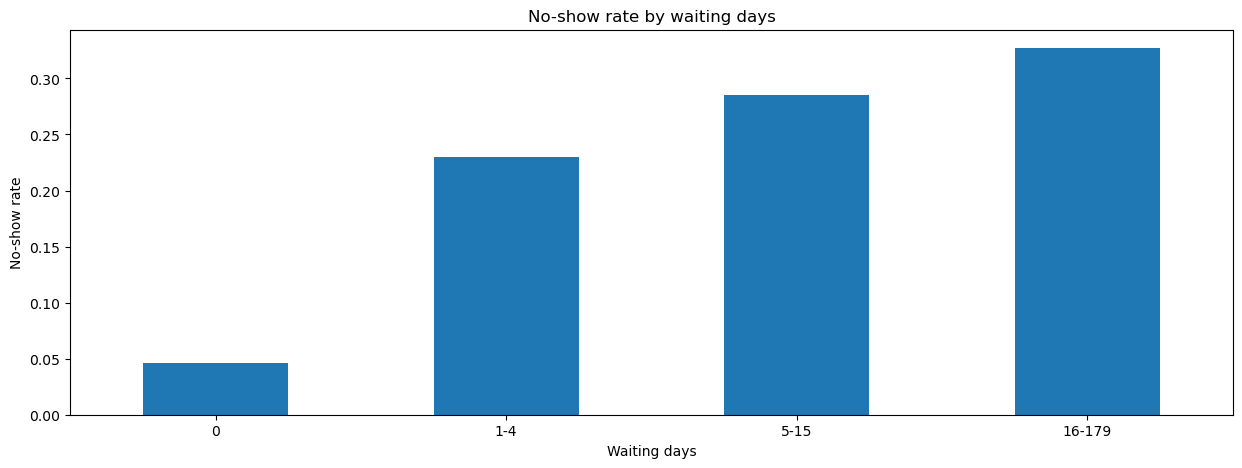

In [14]:
# plot a histogram of waiting_days as a percentage of the range '0', '1-4', '5-15', '16-179'.
waiting_days = pd.cut(df['WaitingDays'], [-1, 0, 4, 15, 179])
ax = df.groupby(waiting_days)['No_show'].mean().plot(kind='bar', figsize=(15, 5))
ax.set_title('No-show rate by waiting days')
ax.set_ylabel('No-show rate')
ax.set_xlabel('Waiting days')
ax.set_xticklabels(['0', '1-4', '5-15', '16-179'], rotation=0)
plt.show()

Based on the above, the longer the timeframe, the more likely you are to have a no-show.

### Question 3. Does Age affect the ability to cancel an appointment?

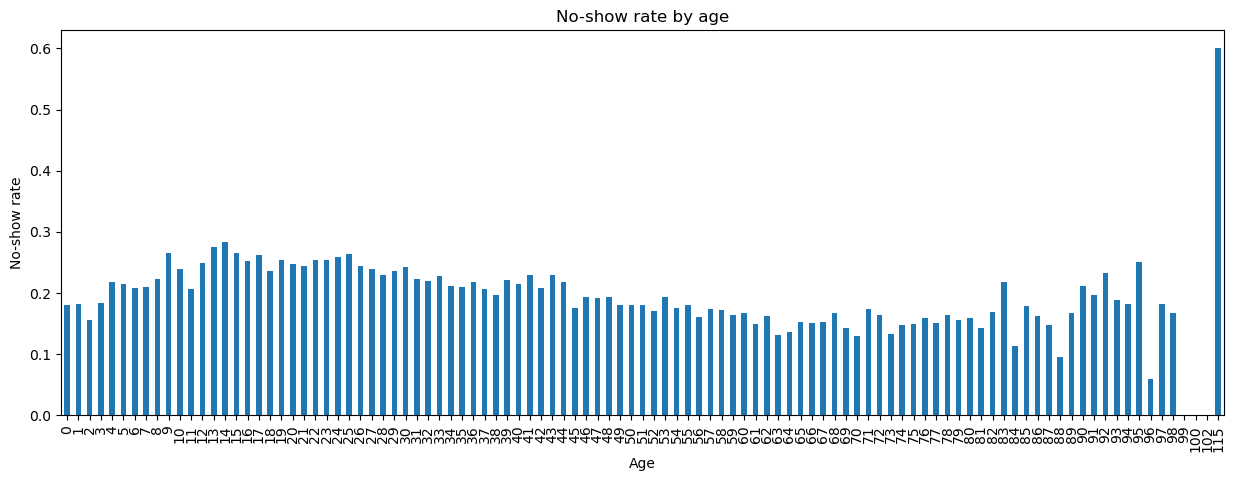

In [15]:
# Plot a histogram with Age as the x-axis and the percentage of No_shows as the y-axis.
ax = df.groupby('Age')['No_show'].mean().plot(kind='bar', figsize=(15, 5))
ax.set_title('No-show rate by age')
ax.set_ylabel('No-show rate')
ax.set_xlabel('Age')
plt.show()

Similarly, since we're averaging, we're removing the number of each age and visualizing them in bins to avoid distortion.

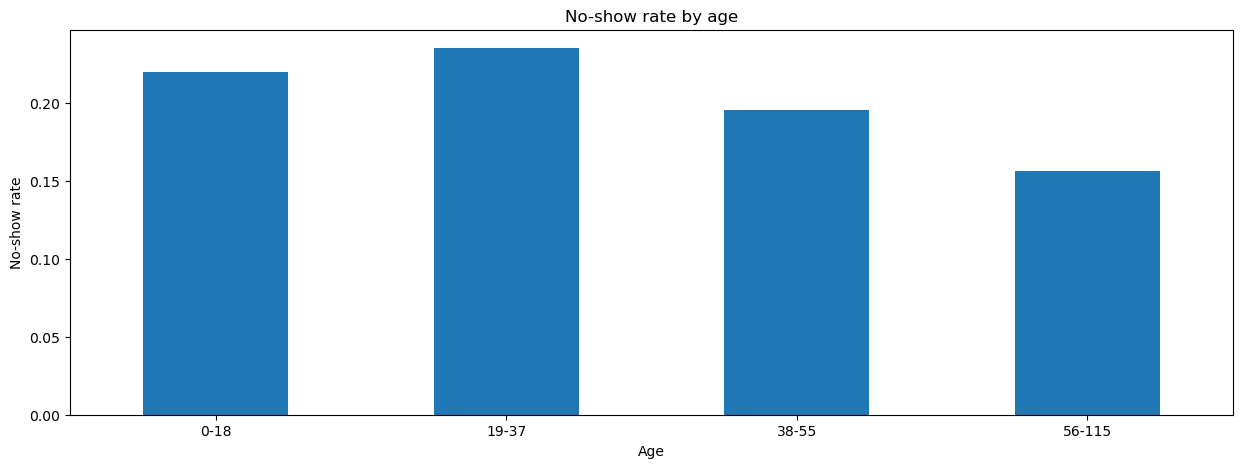

In [16]:
# Plot a histogram of Age as a percentage over the range '0-18', '19-37', '38-55', and '56-115'.
age = pd.cut(df['Age'], [-1, 18, 37, 55, 115])
ax = df.groupby(age)['No_show'].mean().plot(kind='bar', figsize=(15, 5))
ax.set_title('No-show rate by age')
ax.set_ylabel('No-show rate')
ax.set_xlabel('Age')
ax.set_xticklabels(['0-18', '19-37', '38-55', '56-115'], rotation=0)
plt.show()

Based on the above, it appears that the older group has relatively fewer no-shows.

### Question 4. Does the scholarship affect my ability to cancel an appointment?

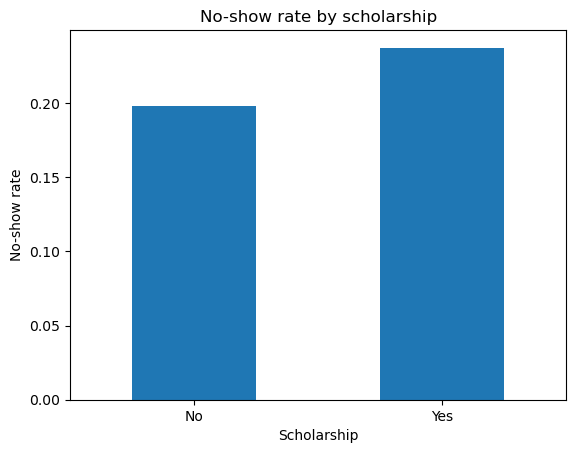

In [17]:
# Group Scholarship to find the percentage of No_shows.
df.groupby('Scholarship')['No_show'].mean()
# Plot a histogram based on scholarship.
ax = df.groupby('Scholarship')['No_show'].mean().plot(kind='bar')
ax.set_title('No-show rate by scholarship')
ax.set_ylabel('No-show rate')
ax.set_xticklabels(['No', 'Yes'], rotation=0)
plt.show()

People without 'Scholarships' tend to be less likely to no-show.

### Question 5. Does the presence of certain medical conditions (hypertension, diabetes, alcoholism) affect the likelihood of canceling an appointment?

Since we can observe people with multiple medical conditions, let's visualize the no-show rate as a function of the number of medical conditions (up to three).

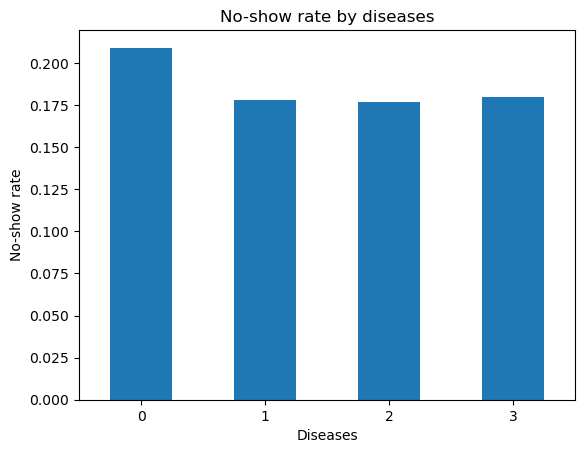

In [18]:
# Add a 'Diseases' column that sums up 'Hypertension', 'Diabetes', and 'Alcoholism'.
df['Diseases'] = df['Hypertension'] + df['Diabetes'] + df['Alcoholism']
# Group Diseases to find the percentage of No_shows.
df.groupby('Diseases')['No_show'].mean()
# Plot a histogram based on Diseases.
ax = df.groupby('Diseases')['No_show'].mean().plot(kind='bar')
ax.set_title('No-show rate by diseases')
ax.set_ylabel('No-show rate')
ax.set_xlabel('Diseases')
ax.set_xticklabels(['0', '1', '2', '3'], rotation=0)
plt.show()

People without illnesses are more likely to no-show than people with illnesses. Having multiple illnesses does not appear to affect no-shows.

### Question 6. Does handicap affect the no-show rate for medical appointments?

Let's find and visualize the percentage of no-shows by handicap.

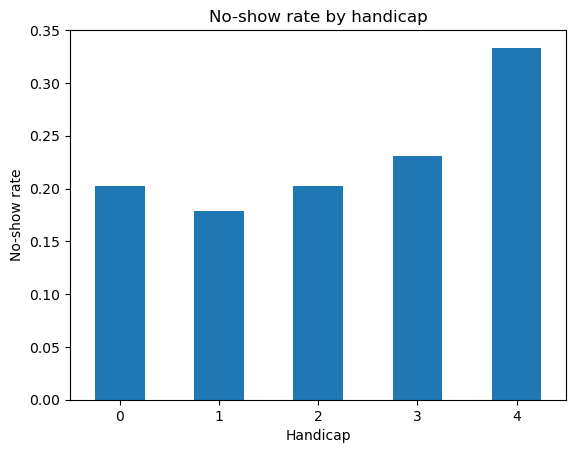

In [19]:
# Group Handicap to find the percentage of No_shows.
df.groupby('Handicap')['No_show'].mean()
# Plot a histogram based on Handicap.
ax = df.groupby('Handicap')['No_show'].mean().plot(kind='bar')
ax.set_title('No-show rate by handicap')
ax.set_ylabel('No-show rate')
ax.set_xlabel('Handicap')
ax.set_xticklabels(['0', '1', '2', '3', '4'], rotation=0)
plt.show()

While higher 'Handicaps' do increase the rate of no-shows, it's unlikely that 'Handicaps' necessarily affect no-shows, as the rate of no-shows with a 'Handicap' of 0 is higher than with a 'Handicap' of 1.

### Question 7. Does the receipt of an SMS influence the cancellation of an appointment?

Visualize similarly.

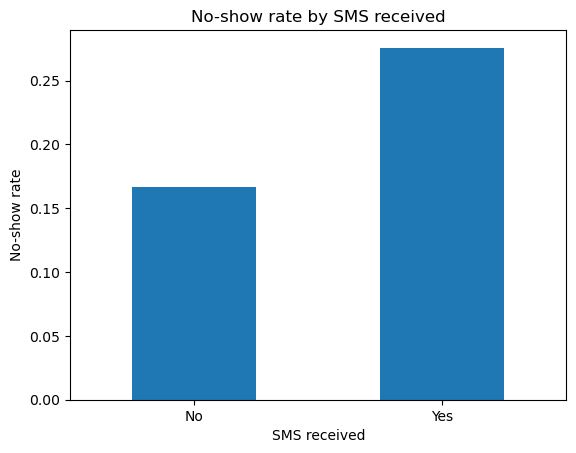

In [20]:
# Group SMS_received to find the percentage of No_shows.
df.groupby('SMS_received')['No_show'].mean()
# Plot a histogram based on SMS_received.
ax = df.groupby('SMS_received')['No_show'].mean().plot(kind='bar')
ax.set_title('No-show rate by SMS received')
ax.set_ylabel('No-show rate')
ax.set_xlabel('SMS received')
ax.set_xticklabels(['No', 'Yes'], rotation=0)
plt.show()

This is a very unexpected result: patients who received an SMS have a higher no-show rate than those who did not receive an SMS.

<a id='conclusions'></a>
## Conclusions

We looked for answers to seven questions, which allowed us to identify the characteristics of people who cancel appointments. 
'Gender' and 'Handicap' are less certain to influence no-shows, but if you have a severe 'Handicap' you are more likely to no-show. 
'Age' is associated with a lower likelihood of no-shows, but older children are less likely to no-show than younger adults.
People on 'scholarship' are more likely to no-show. 
Also, people who don't have an 'Diseases' tend to no-show more than people who do.
And obviously, the longer the 'WaitingDays', the higher the probability of no-shows, especially for same-day bookings, which are noticeably less likely than other segments.
It's interesting to note that people who received an "SMS" were more likely to no-show.
However, it's difficult to conclude that not sending SMS reduces no-shows.

Although it's presented as such, this is simply an observation and not a statistically significant result. 
As such, it's difficult to use these results to create policies to reduce no-shows. 
More data should be collected and statistically significant results should be obtained to help reduce no-shows.